In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
from tqdm import tqdm
import os
import datetime
import matplotlib.dates as mdates

In [3]:
stationInfo = pd.read_csv('../../Metro/station_transInfo_cleaned.csv')
dict_staionName = dict(zip(stationInfo['stationID'], stationInfo['name']))
dict_stationLoc = dict(zip(stationInfo['stationID'], zip(stationInfo['lon'],stationInfo['lat'])))
stationID_List = list(stationInfo['stationID'])

root_path = '/data6/peiyan/SH-METR/results/' 
raw_data = pd.read_csv(os.path.join(root_path, 'metroData_Demandflow_10.csv'))
raw_data

,date,timeslot,startTime,endTime,station,inFlow,outFlow,CinFlow,HO_inFlow,WO_inFlow,CoutFlow,HO_outFlow,WO_outFlow
0,20170501,0,60000,61000,112,29,32,9,15,0,11,13,1
1,20170501,0,60000,61000,113,142,102,40,51,4,30,41,1
2,20170501,0,60000,61000,114,66,35,17,19,7,12,10,2
3,20170501,0,60000,61000,119,23,14,6,9,0,1,3,2
4,20170501,0,60000,61000,124,17,21,2,4,2,0,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3788887,20170831,12545,225000,230000,2053,6,26,2,0,1,8,6,4
3788888,20170831,12545,225000,230000,2054,18,110,5,2,6,19,39,12
3788889,20170831,12545,225000,230000,2055,5,80,0,1,2,19,23,6
3788890,20170831,12545,225000,230000,2056,33,99,8,4,1,20,31,6


In [4]:
totalFlow = [] # 线网总流量（每天）
dayList = []

curr_date = 20170501
currDayFlow = 0
for line in tqdm(raw_data.values):
    if curr_date != line[0]:
        totalFlow.append(currDayFlow)
        dayList.append(curr_date)
        curr_date = line [0]
        
        currDayFlow = 0

    currDayFlow += line[5]

totalFlow.append(currDayFlow)
dayList.append(curr_date)
totalFlow = np.array(totalFlow)

100%|██████████| 3788892/3788892 [00:02<00:00, 1453245.43it/s]


In [5]:
len(totalFlow)

123

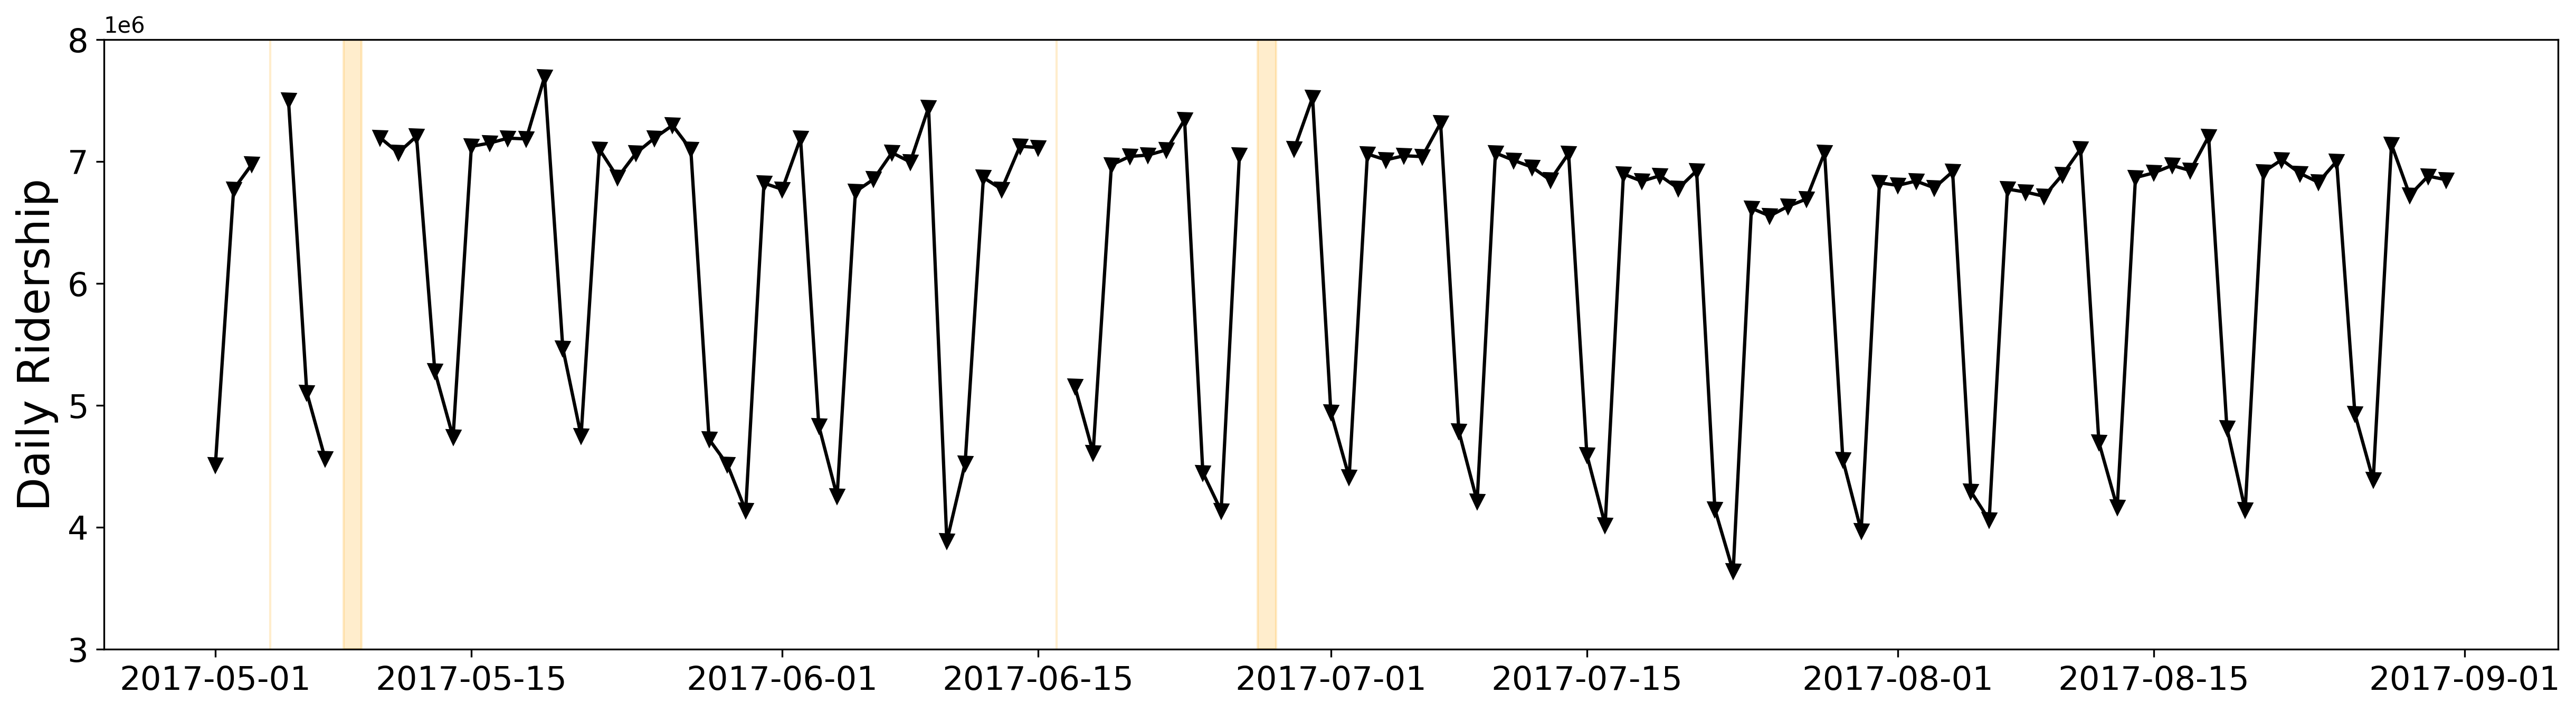

In [ ]:
start_date = "2017-05-01"
end_date = "2017-08-31"

mydates = pd.date_range(start=datetime.datetime.strptime(start_date,"%Y-%m-%d"), end=datetime.datetime.strptime(end_date,"%Y-%m-%d"), freq="1D")
threshold = 1e6

# 创建 mask (遮罩掉大于阈值的点)
mask = totalFlow<threshold

# 使用 masked array
masked_totalFlow = np.ma.masked_where(mask, totalFlow)

# 绘图
plt.figure(figsize=(20, 5), dpi=300)
plt.plot(mydates, masked_totalFlow, marker='v', linestyle='-', color='#000000')
plt.ylim(3e6, 8e6)
plt.fill_between(mydates, 3e6, 8e6, where=mask, color='orange', alpha=0.2, label="Data Missing")
plt.ylabel("Daily Ridership", fontsize=20)
plt.tick_params(labelsize=15)
plt.savefig('../results/dataIntegrity.pdf')

"""数据完整性检查

设置阈值（100万人次）来识别异常低的流量数据
正常情况下上海地铁日客流量应该在300-800万人次之间
低于100万的数据被认为是数据缺失或异常
    """